# Datasets

[https://data.mendeley.com/datasets/tywbtsjrjv/1](https://data.mendeley.com/datasets/tywbtsjrjv/1)

[https://data.mendeley.com/datasets/hb74ynkjcn/1](https://data.mendeley.com/datasets/hb74ynkjcn/1)

[https://www.kaggle.com/datasets/janmejaybhoi/cotton-disease-dataset](https://www.kaggle.com/datasets/janmejaybhoi/cotton-disease-dataset)

# Installing dependencies and Setup

In [1]:
import tensorflow as tf
import os

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
# Avoid OOM (Out of Memory) errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Remove Dodgy Images

In [5]:
import cv2
import imghdr # To check image extensions

In [ ]:
image_exts = ['jpg', 'jpeg', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)   # Reads as an array
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

# Load the Data

In [5]:
data_dir = 'Dataset/Data/'

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 52945 files belonging to 56 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

In [10]:
# This represents the images
batch[0]

array([[[[105.      ,  84.      , 103.      ],
         [122.      , 101.      , 120.      ],
         [115.      ,  94.      , 113.      ],
         ...,
         [133.      , 118.      , 141.      ],
         [127.      , 112.      , 135.      ],
         [132.      , 117.      , 140.      ]],

        [[114.      ,  93.      , 112.      ],
         [129.      , 108.      , 127.      ],
         [128.      , 107.      , 126.      ],
         ...,
         [146.      , 131.      , 154.      ],
         [141.      , 126.      , 149.      ],
         [136.      , 121.      , 144.      ]],

        [[122.      , 101.      , 120.      ],
         [126.      , 105.      , 124.      ],
         [126.      , 105.      , 124.      ],
         ...,
         [145.      , 130.      , 153.      ],
         [139.      , 124.      , 147.      ],
         [127.      , 112.      , 135.      ]],

        ...,

        [[123.      , 110.      , 128.      ],
         [134.      , 121.      , 139.      ]

In [11]:
# This represents label
batch[1]

array([34, 51, 49, 26,  5,  3,  3, 21, 32,  5,  4, 55, 21,  4, 55,  3, 44,
       17, 52, 35, 55, 55, 27, 19,  2, 16, 55, 55, 16,  5, 41, 23])

# Scale the data

In [12]:
batch[0].shape

(32, 256, 256, 3)

In [13]:
# Transforming data in range 0 to 1 to speed up computation

data = data.map(lambda x,y: (x/255, y))

In [14]:
scaled_iterator = data.as_numpy_iterator()

In [15]:
batch = scaled_iterator.next()

# Split the Data

In [16]:
train_size = int(len(data)*.85)
val_size = int(len(data)*.10)
test_size = int(len(data)*.05)+2

In [17]:
len(data)

1655

In [18]:
train_size

1406

In [19]:
val_size

165

In [20]:
test_size

84

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = (data.skip(train_size+val_size).take(test_size))

# Building Deep CNN Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Softmax

In [23]:
batch[0].max()

1.0

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(512, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(56, activation='softmax'))

In [26]:
from keras.optimizers import Adam
# Adam is used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       7

# Training

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [32]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[callback])

Epoch 1/15
1406/1406 [==============================] - 931s 659ms/step - loss: 2.5178 - accuracy: 0.3213 - val_loss: 1.5789 - val_accuracy: 0.5975
Epoch 2/15
1406/1406 [==============================] - 946s 672ms/step - loss: 1.2279 - accuracy: 0.6257 - val_loss: 0.9094 - val_accuracy: 0.7511
Epoch 3/15
1406/1406 [==============================] - 1005s 714ms/step - loss: 0.8554 - accuracy: 0.7358 - val_loss: 0.6633 - val_accuracy: 0.8152
Epoch 4/15
1406/1406 [==============================] - 949s 674ms/step - loss: 0.6548 - accuracy: 0.7935 - val_loss: 0.5120 - val_accuracy: 0.8500
Epoch 5/15
1406/1406 [==============================] - 927s 659ms/step - loss: 0.5311 - accuracy: 0.8311 - val_loss: 0.4778 - val_accuracy: 0.8562
Epoch 6/15
1406/1406 [==============================] - 919s 653ms/step - loss: 0.4309 - accuracy: 0.8610 - val_loss: 0.3461 - val_accuracy: 0.8937
Epoch 7/15
1406/1406 [==============================] - 921s 655ms/step - loss: 0.3639 - accuracy: 0.8825 - val

# Plot Performance

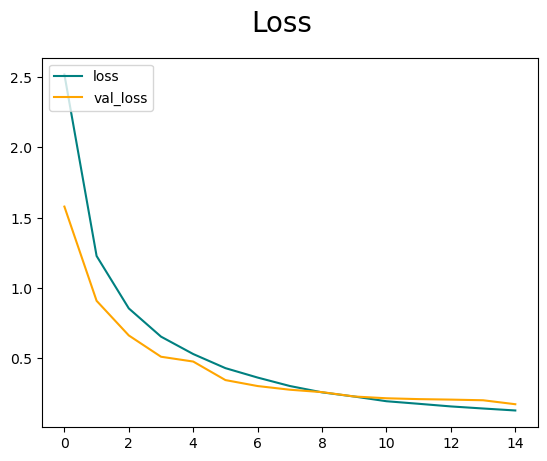

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

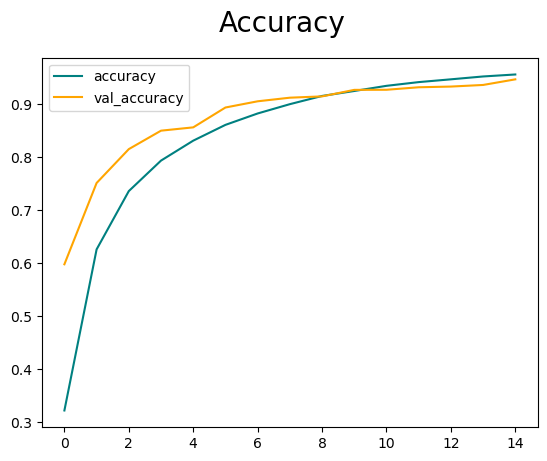

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Loading the model

In [36]:
model.save('my_model.h5')

In [22]:
from tensorflow.keras.models import load_model

# Load the saved model from file
loaded_model = load_model('my_model.h5')

In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image file and preprocess it for prediction
img = image.load_img('Dataset/Test/img11.png', target_size=(256, 256), grayscale=False)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Use the loaded model to make predictions on the image
predictions = loaded_model.predict(img_array)

# Get the predicted class label
class_label = np.argmax(predictions)

# Print the predicted class label
print('Predicted class label:', class_label)

1/1 [==============================] - 0s 31ms/step
Predicted class label: 47
